#### Basic Linear Regression

**Problems of Linear Regression**
Problem Statement
* Fever
* Input : Temperature
* Output : Fever or No Fever

Remember
* Linear Regression : Minimize the error between the points and line

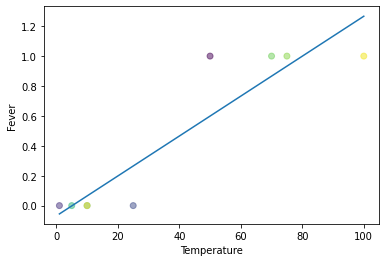

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

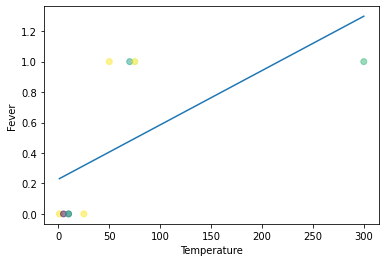

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

**Note**: Above we see its a bad idea to use linear regression for classification. Fever poitns not predicted with outliers like 300 in second figure

#### Linear Regression with PyTorch

In [1]:
#import
import numpy as np
import matplotlib.pyplot as plt

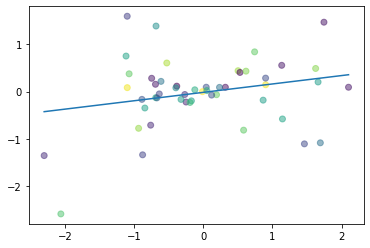

In [2]:
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)
colors = np.random.rand(n)

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

#### Building Linear Regression model with PyTorch

In [3]:
x_values = [i for i in range(11)]

In [4]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [5]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [6]:
## Important : 2D shape required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [7]:
y_values = [2*i + 1 for i in x_values]

In [8]:
y_values = np.array(y_values, dtype=np.float32)

In [9]:
y_train = y_values.reshape(-1, 1)

In [10]:
y_train.shape

(11, 1)

#### Model Building 

In [11]:
#import
import torch
import torch.nn as nn
from torch.autograd import Variable

In [12]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [13]:
#Instantiate model class
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [14]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.7969]], requires_grad=True), Parameter containing:
 tensor([0.7780], requires_grad=True)]

In [15]:
criterion = nn.MSELoss()

In [16]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
#Train Model
epochs = 100

In [19]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch variables for gradient collection
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t parameters (collected in previous epoch)
    optimizer.zero_grad()
    
    # Forward to get output, calling the model directly runs the forward function
    outputs = model(inputs)
    
    # Calculate loss
    loss = criterion(outputs, labels)
    
    # Getting Gradients w.r.t. parameters
    loss.backward()
    
    # Updating Parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data.item()))

epoch 1, loss 22.850584030151367
epoch 2, loss 1.8718911409378052
epoch 3, loss 0.16063667833805084
epoch 4, loss 0.02096627838909626
epoch 5, loss 0.009485946968197823
epoch 6, loss 0.008462662808597088
epoch 7, loss 0.008293375372886658
epoch 8, loss 0.008194632828235626
epoch 9, loss 0.008102626539766788
epoch 10, loss 0.008012095466256142
epoch 11, loss 0.007922631688416004
epoch 12, loss 0.007834150455892086
epoch 13, loss 0.007746665272861719
epoch 14, loss 0.007660177070647478
epoch 15, loss 0.007574623450636864
epoch 16, loss 0.007490058429539204
epoch 17, loss 0.0074064298532903194
epoch 18, loss 0.007323712110519409
epoch 19, loss 0.007241934537887573
epoch 20, loss 0.007161055691540241
epoch 21, loss 0.007081096060574055
epoch 22, loss 0.007002016995102167
epoch 23, loss 0.006923801731318235
epoch 24, loss 0.006846517324447632
epoch 25, loss 0.006770070176571608
epoch 26, loss 0.006694419775158167
epoch 27, loss 0.006619710009545088
epoch 28, loss 0.00654580257833004
epoch 2

In [20]:
#Compare Data
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

In [21]:
predicted

array([[ 1.1004544],
       [ 3.085988 ],
       [ 5.0715218],
       [ 7.057055 ],
       [ 9.042589 ],
       [11.028122 ],
       [13.013656 ],
       [14.999189 ],
       [16.984724 ],
       [18.970257 ],
       [20.95579  ]], dtype=float32)

In [22]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

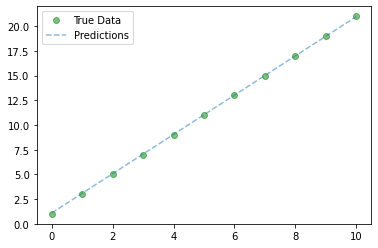

In [23]:
# clear figure (Plot Graph)
plt.clf()

# plot true data
plt.plot(x_train, y_train, 'go', label = 'True Data', alpha = 0.5)

# plot predictions
plt.plot(x_train, predicted, '--', label = 'Predictions', alpha = 0.5)

# legend and plot
plt.legend(loc='best')
plt.show()

In [24]:
#Save Model
save_model = False
if save_model is True:
    torch.save(model.state_dict(), 'awesome_model.pkl')

In [25]:
#Load Model
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

#### CPU to GPU

In [27]:
#import
import torch
import torch.nn as nn
from torch.autograd import Variable

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out
    
    
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

## USE GPU for model
if torch.cuda.is_available():
    model.cuda()

criterion = nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch variables for gradient collection
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    
    # Clear gradients w.r.t parameters (collected in previous epoch)
    optimizer.zero_grad()
    
    # Forward to get output, calling the model directly runs the forward function
    outputs = model(inputs)
    
    # Calculate loss
    loss = criterion(outputs, labels)
    
    # Getting Gradients w.r.t. parameters
    loss.backward()
    
    # Updating Parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data.item()))

epoch 1, loss 47.22786331176758
epoch 2, loss 3.9506607055664062
epoch 3, loss 0.4195781648159027
epoch 4, loss 0.13047213852405548
epoch 5, loss 0.1058158278465271
epoch 6, loss 0.10274166613817215
epoch 7, loss 0.10144022852182388
epoch 8, loss 0.10029479116201401
epoch 9, loss 0.09917374700307846
epoch 10, loss 0.09806635230779648
epoch 11, loss 0.09697111696004868
epoch 12, loss 0.09588824957609177
epoch 13, loss 0.09481751173734665
epoch 14, loss 0.09375878423452377
epoch 15, loss 0.09271170943975449
epoch 16, loss 0.09167639166116714
epoch 17, loss 0.0906527191400528
epoch 18, loss 0.089640311896801
epoch 19, loss 0.08863947540521622
epoch 20, loss 0.08764943480491638
epoch 21, loss 0.08667072653770447
epoch 22, loss 0.08570291846990585
epoch 23, loss 0.08474600315093994
epoch 24, loss 0.0837995857000351
epoch 25, loss 0.08286380022764206
epoch 26, loss 0.08193858712911606
epoch 27, loss 0.08102361112833023
epoch 28, loss 0.08011879026889801
epoch 29, loss 0.07922402024269104
epo